# Visualization Notebook - Attacking the US Opioid Epidemic
## Joseph Blankenship and Jacob Mitchell
This notebook is being used to plot multidimensional data and visuals multidimensional regression models between our predictors

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [2]:
tots_2017 = pd.read_csv("totals2017.csv")
tots_2018 = pd.read_csv("totals2018.csv")

In [3]:
x_max = tots_2017['EducationLTHSValue'].max()
y_max = tots_2017['ExcessiveDrinkingValue'].max()

x_min = tots_2017['EducationLTHSValue'].min()
y_min = tots_2017['ExcessiveDrinkingValue'].min()

x_num_dots = 30
y_num_dots = 30

In [4]:
#tots_2017

In [5]:
X = tots_2017[['EducationLTHSValue','ExcessiveDrinkingValue']].values.reshape(-1,2)
Y = tots_2017['SmokingValue']
#tots_2017['EducationLTHSValue']
#tots_2017['ExcessiveDrinkingValue']
#tots_2017['Opioid_Prscrbng_Rate']

In [6]:
#X = prac_df[['age','temp']].values.reshape(-1,2)
#Y = prac_df['height']

In [7]:
x = X[:, 0]
y = X[:, 1]
z = Y

In [8]:
x_pred = np.linspace(x_min, x_max, x_range)   # range of porosity values
y_pred = np.linspace(y_min, y_max, y_range) 

xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

NameError: name 'x_range' is not defined

In [44]:
lr = linear_model.LinearRegression()

model = lr.fit(X, Y)
predicted = model.predict(model_viz)

r2 = model.score(X, Y)

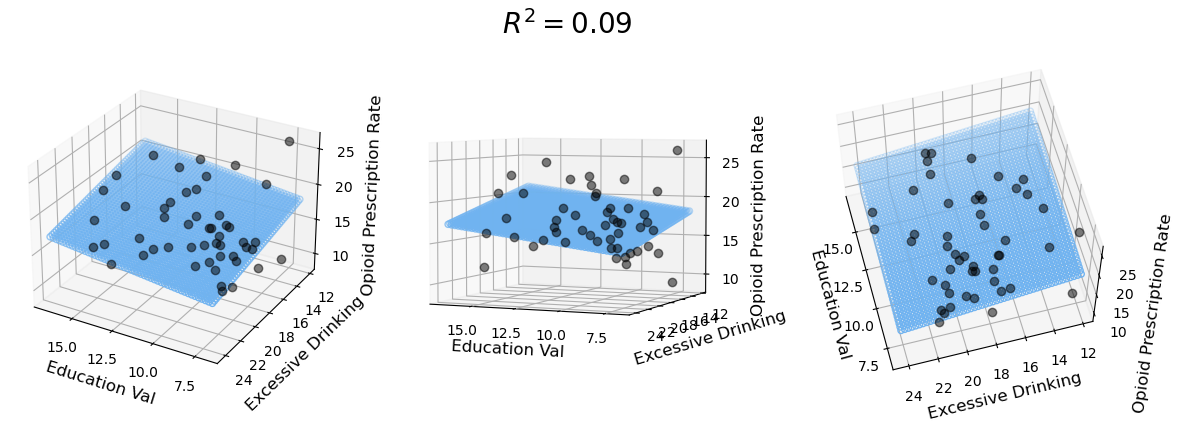

In [61]:
plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Education Val', fontsize=12)
    ax.set_ylabel('Excessive Drinking', fontsize=12)
    ax.set_zlabel('Opioid Prescription Rate', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

#ax1.text2D(0.2, 0.32,'CS 6010', fontsize=13, ha='center', va='center',
           #transform=ax1.transAxes, color='grey', alpha=0.5)
#ax2.text2D(0.3, 0.42, 'CS 6010', fontsize=13, ha='center', va='center',
           #transform=ax2.transAxes, color='grey', alpha=0.5)
#ax3.text2D(0.85, 0.85, 'CS 6010', fontsize=13, ha='center', va='center',
           #transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()
